/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


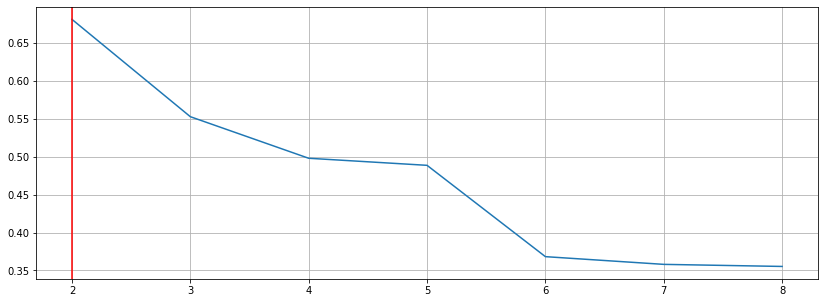

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

import random
import math 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score


df_iris = pd.read_csv('/content/drive/Shareddrives/CSC373_DMP_Wu_Chenyang/DMP_Clustering/Data/Iris_student.csv',header = None)
df_iris = df_iris.drop(df_iris.index[0])
df_iris = df_iris.drop(df_iris.columns[0], 1)


df_iris = df_iris.astype(float)

# Find the best number K for this dataset. 

num_clusters = [2,3,4,5,6,7,8] # number of clusters

sil_score = [] # prepare for silhouette score

# Use sihouette score to define the best number of clusters 
for n in num_clusters:
  KM_pp = KMeans(n_clusters = n, init = 'k-means++').fit(df_iris)
  sil_avg =  silhouette_score(df_iris, KM_pp.labels_)
  sil_score.append(sil_avg)
  


sil_plt, ax = plt.subplots(figsize=(14,5))
ax = sns.lineplot(num_clusters,sil_score, ax = ax)
ax.axvline(2, c = 'r')
plt.grid()
plt.show()


In [25]:
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree
from yellowbrick.cluster import SilhouetteVisualizer

In [2]:
# from the graph above, we get that the best number is 2
# But for the comparison with my own algorithm, I will use 3 instead

df_iris = np.array(df_iris)
KM_3 = KMeans(n_clusters= 3 , init = 'k-means++').fit(df_iris)

y_KM = KM_3.predict(df_iris)





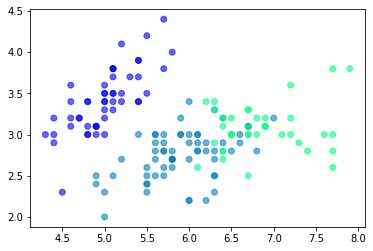

In [3]:
plt.scatter(df_iris[:,0], df_iris[:,1], c = y_KM, s = 35, cmap="winter", alpha=0.6)

In [73]:
df_market = pd.read_csv('/content/drive/Shareddrives/CSC373_DMP_Wu_Chenyang/DMP_Clustering/Data/Ecommerce Customers.csv')
df_market= df_market.iloc[: , 3:]


df_market = df_market.astype(float)
#df_market = np.array(df_market)
num_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14]
sil_scores = []
cluster_inertia = []


for n in num_clusters:
  KM_mark = KMeans(n_clusters= n, init="k-means++").fit(df_market)
  cluster_inertia.append(KM_mark.inertia_)
  silhouette_avg = silhouette_score(df_market,KM_mark.labels_)
  sil_scores.append(silhouette_avg)


#print(df_market)



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



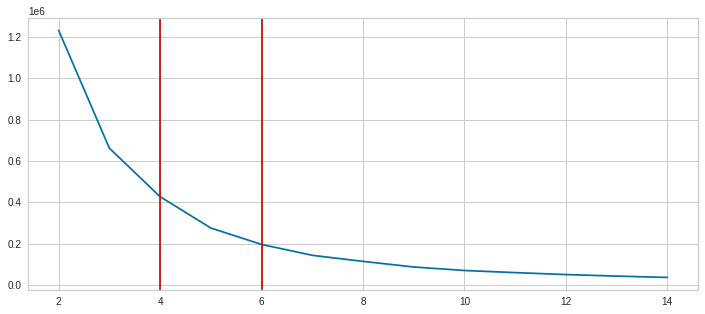

In [74]:
# elbow method

fig, ax = plt.subplots(figsize=(12,5))

ax = sns.lineplot(num_clusters, cluster_inertia, ax = ax )

ax.axvline(4,  c="r")
ax.axvline(6,  c="r")

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



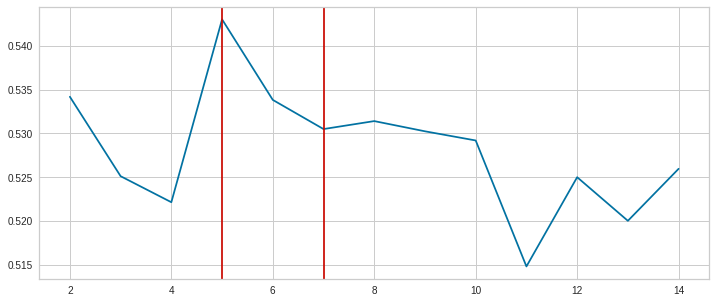

In [75]:
sil_plt, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(num_clusters,sil_scores, ax = ax)
ax.axvline(5, c = 'r')
ax.axvline(7, c = 'r')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



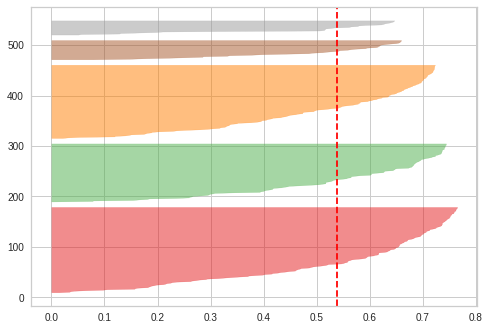

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



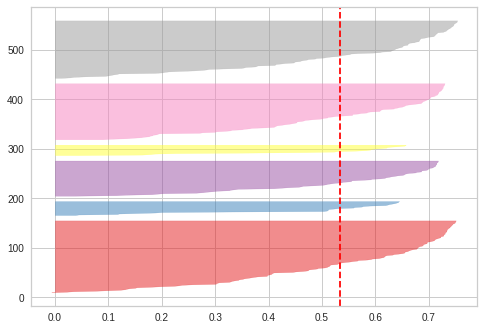

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



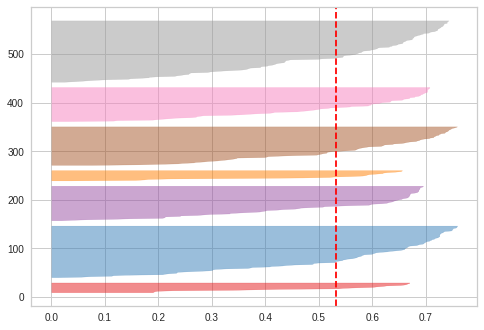

In [76]:
selected_clus = [5,6,7]
# select several numbers of cluster based on elbow method

for n in selected_clus:
  clust_vis = KMeans(n_clusters= n, init="k-means++",random_state= 5).fit(df_market)
  vis = SilhouetteVisualizer(clust_vis)
  vis.fit(df_market)
  plt.show()


In [64]:
KM_5 = KMeans(n_clusters= 5, init="k-means++").fit(df_market)

df_clus = df_market.copy()
df_clus.loc[:,'Cluster'] = KM_5.labels_




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



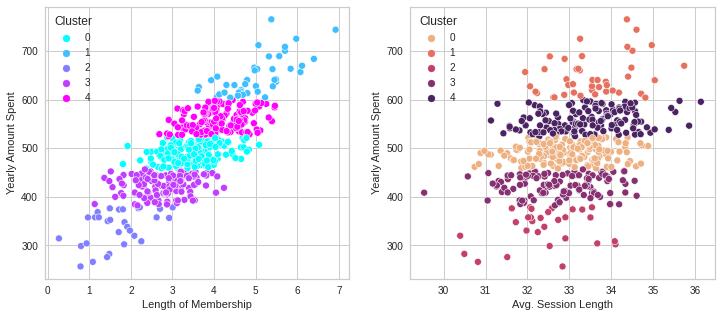

In [85]:
fig1, (axes) = plt.subplots(1,2,figsize=(12,5))


scat_1 = sns.scatterplot('Length of Membership', 'Yearly Amount Spent', data=df_clus,
                hue='Cluster',palette='cool', ax=axes[0], legend='full')

sns.scatterplot('Avg. Session Length', 'Yearly Amount Spent', data=df_clus,
                hue='Cluster', palette='flare', ax=axes[1], legend='full')


plt.show()

In [86]:
import plotly as ply
import plotly.graph_objs as go

def tracer(db, n, name):

    return go.Scatter3d(
        x = db[db['Cluster']==n]['Length of Membership'],
        y = db[db['Cluster']==n]['Yearly Amount Spent'],
        z = db[db['Cluster']==n]['Avg. Session Length'],
        mode = 'markers',
        name = name,
        marker = dict(
            size = 4
        )
     )

trace0 = tracer(df_clus, 0, 'Cluster 0')
trace1 = tracer(df_clus, 1, 'Cluster 1')
trace2 = tracer(df_clus, 2, 'Cluster 2')
trace3 = tracer(df_clus, 3, 'Cluster 3')
trace4 = tracer(df_clus, 4, 'Cluster 4')

data = [trace0, trace1, trace2, trace3, trace4]

layout = go.Layout(

    scene = dict(
            xaxis = dict(title = 'Age'),
            yaxis = dict(title = 'Spending Score'),
            zaxis = dict(title = 'Annual Income')
        )
)

fig = go.Figure(data=data, layout=layout)
ply.offline.iplot(fig)

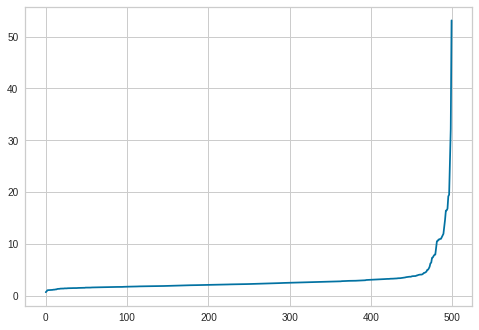

In [109]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

df_db = df_market.copy()
nn=NearestNeighbors(n_neighbors=4)
nn.fit(df_market)
distance,index=nn.kneighbors(df_market)
plt.plot(np.sort(distance[:,3]))
plt.show()



In [110]:
epsilon = 14
mins = 5

dbs = DBSCAN(eps = epsilon, min_samples = mins )

df_db['Cluster'] = dbs.fit_predict(df_market)
df_db.Cluster.value_counts()



 0    487
-1      8
 1      5
Name: Cluster, dtype: int64

In [105]:
df_db=df_db[df_db.Cluster != -1]

In [106]:

trace0 = tracer(df_db, 0, 'Cluster 0')
trace1 = tracer(df_db, 1, 'Cluster 1')
trace2 = tracer(df_db, 2, 'Cluster 2')
trace3 = tracer(df_db, 3, 'Cluster 3')
trace4 = tracer(df_db, 4, 'Cluster 4')

data = [trace0, trace1, trace2, trace3, trace4]

layout = go.Layout(

    scene = dict(
            xaxis = dict(title = 'Age'),
            yaxis = dict(title = 'Spending Score'),
            zaxis = dict(title = 'Annual Income')
        )
)

fig = go.Figure(data=data, layout=layout)
ply.offline.iplot(fig)